In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename=("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv")
df=pd.read_csv(filename)
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


## 1)Exploratory Data Analysis (EDA):
## a)Analyze the distribution of categorical features such as Card_Type, Merchant_Category,Location, etc.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [4]:
df["Transaction_DateTime"]=pd.to_datetime(df["Transaction_DateTime"])

Transaction_DateTime in object data type,so changed to datetime format

In [5]:
categorical_features=df.select_dtypes("O")
categorical_features=categorical_features.drop(columns=["Transaction_ID"])
categorical_cols=['Card_Type', 'Merchant_Category', 'Location', 'Region','Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent']

With the above analysis found null values in the categorical & Numerical features

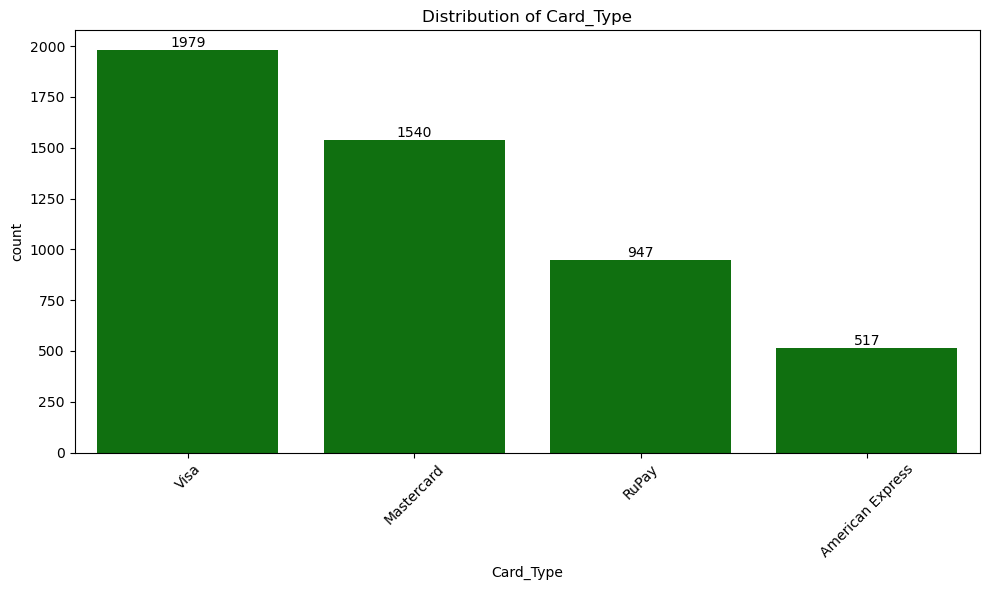

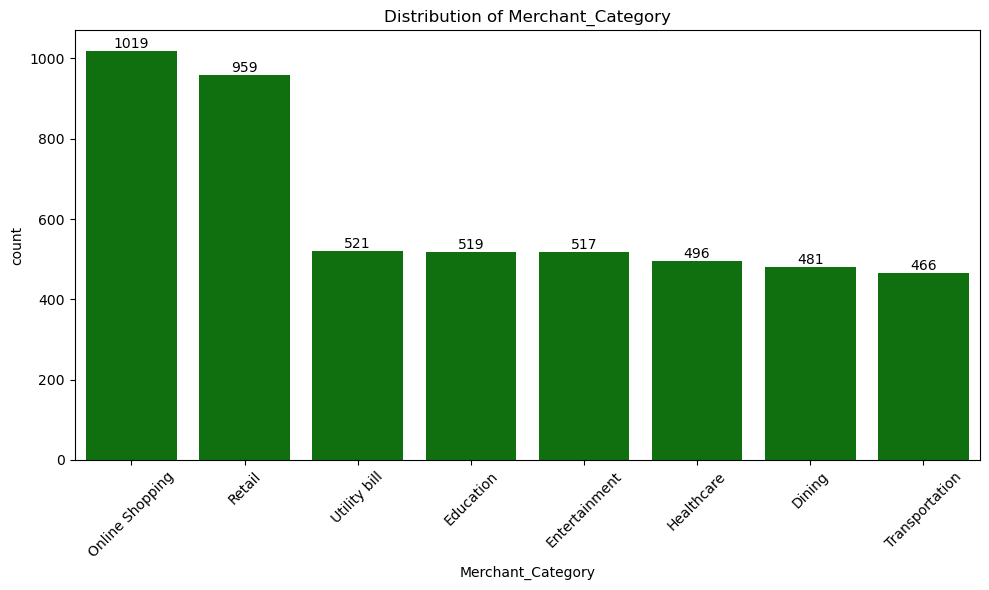

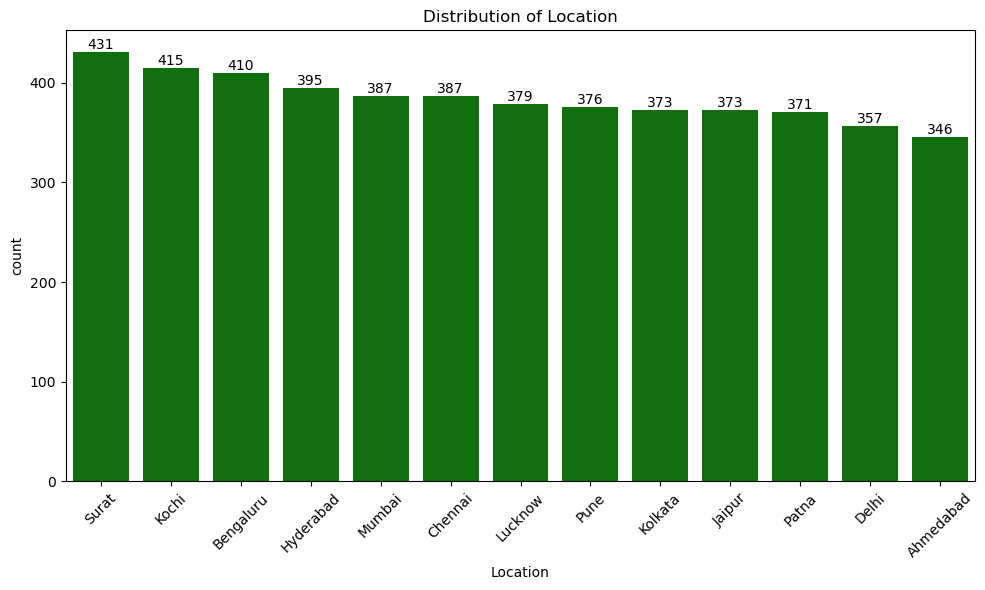

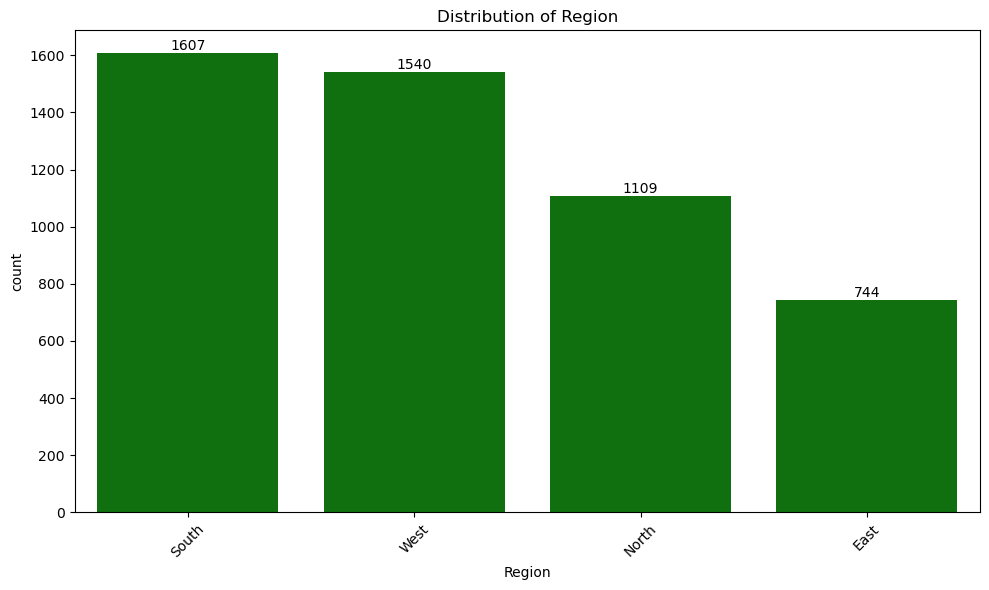

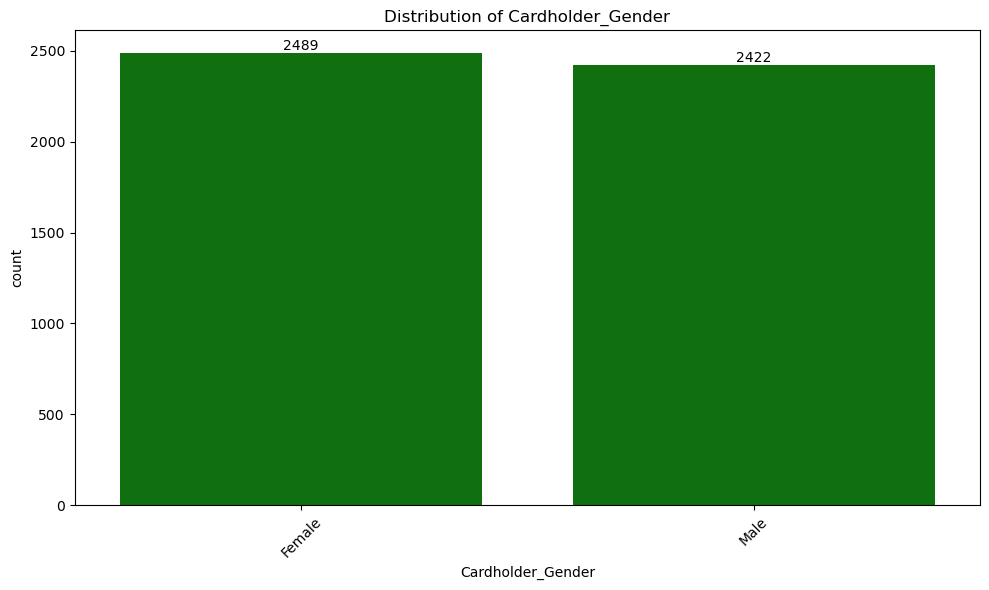

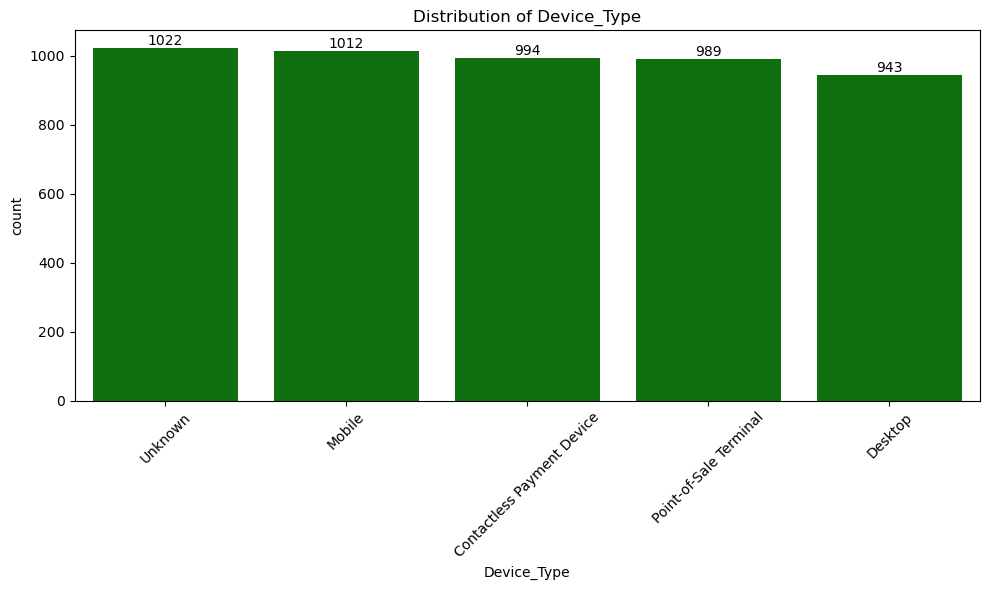

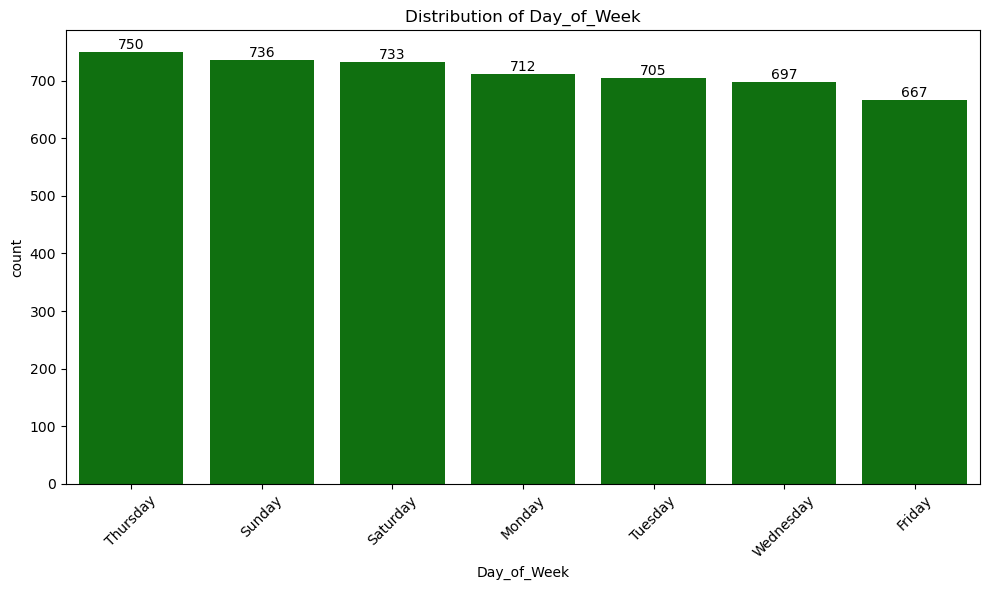

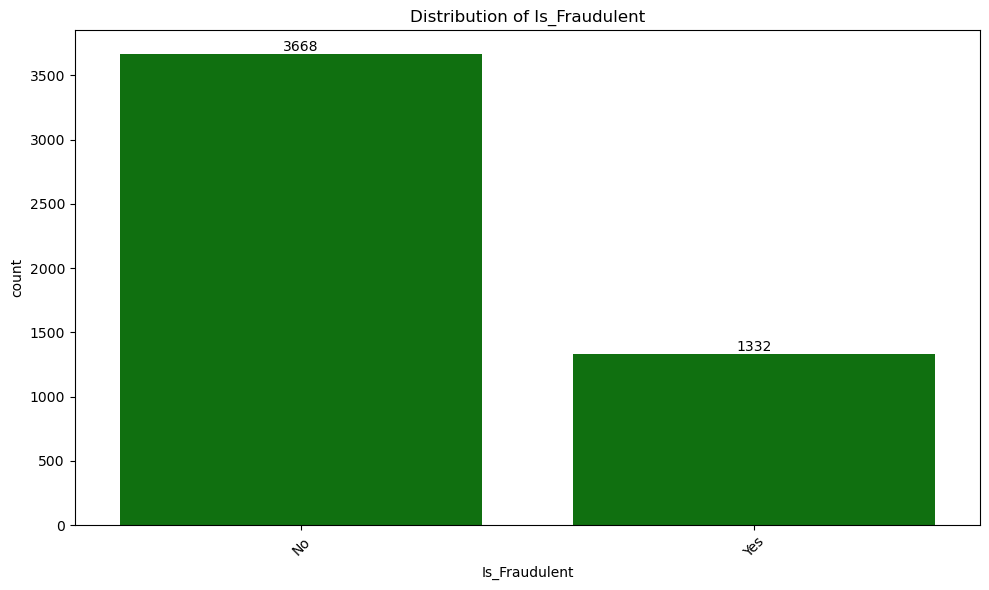

In [6]:
for col in categorical_features:
    plt.figure(figsize=(10,6))
    bar=sns.countplot(data =df ,x=col,order=df[col].value_counts().index,color="green")
    bar.bar_label(bar.containers[0])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## b)Explore numerical features like Transaction_Amount, Cardholder_Age,Cardholder_Monthly_Income, and Cardholder_Average_Spend. Use descriptive statistics tounderstand their central tendency and spread.

In [7]:
numerical_features=df.select_dtypes(exclude="O")
numerical_features=numerical_features.drop(columns=['Transaction_DateTime'])
numerical_cols=["Transaction_Amount","Cardholder_Age","Cardholder_Monthly_Income","Cardholder_Average_Spend","Credit_Limit"]

In [8]:
numerical_features.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


## c)Conduct bivariate and multivariate analysis to identify potential relationships between the features as well as with the target variable (Is_Fraudulent)

Bivariate Analysis

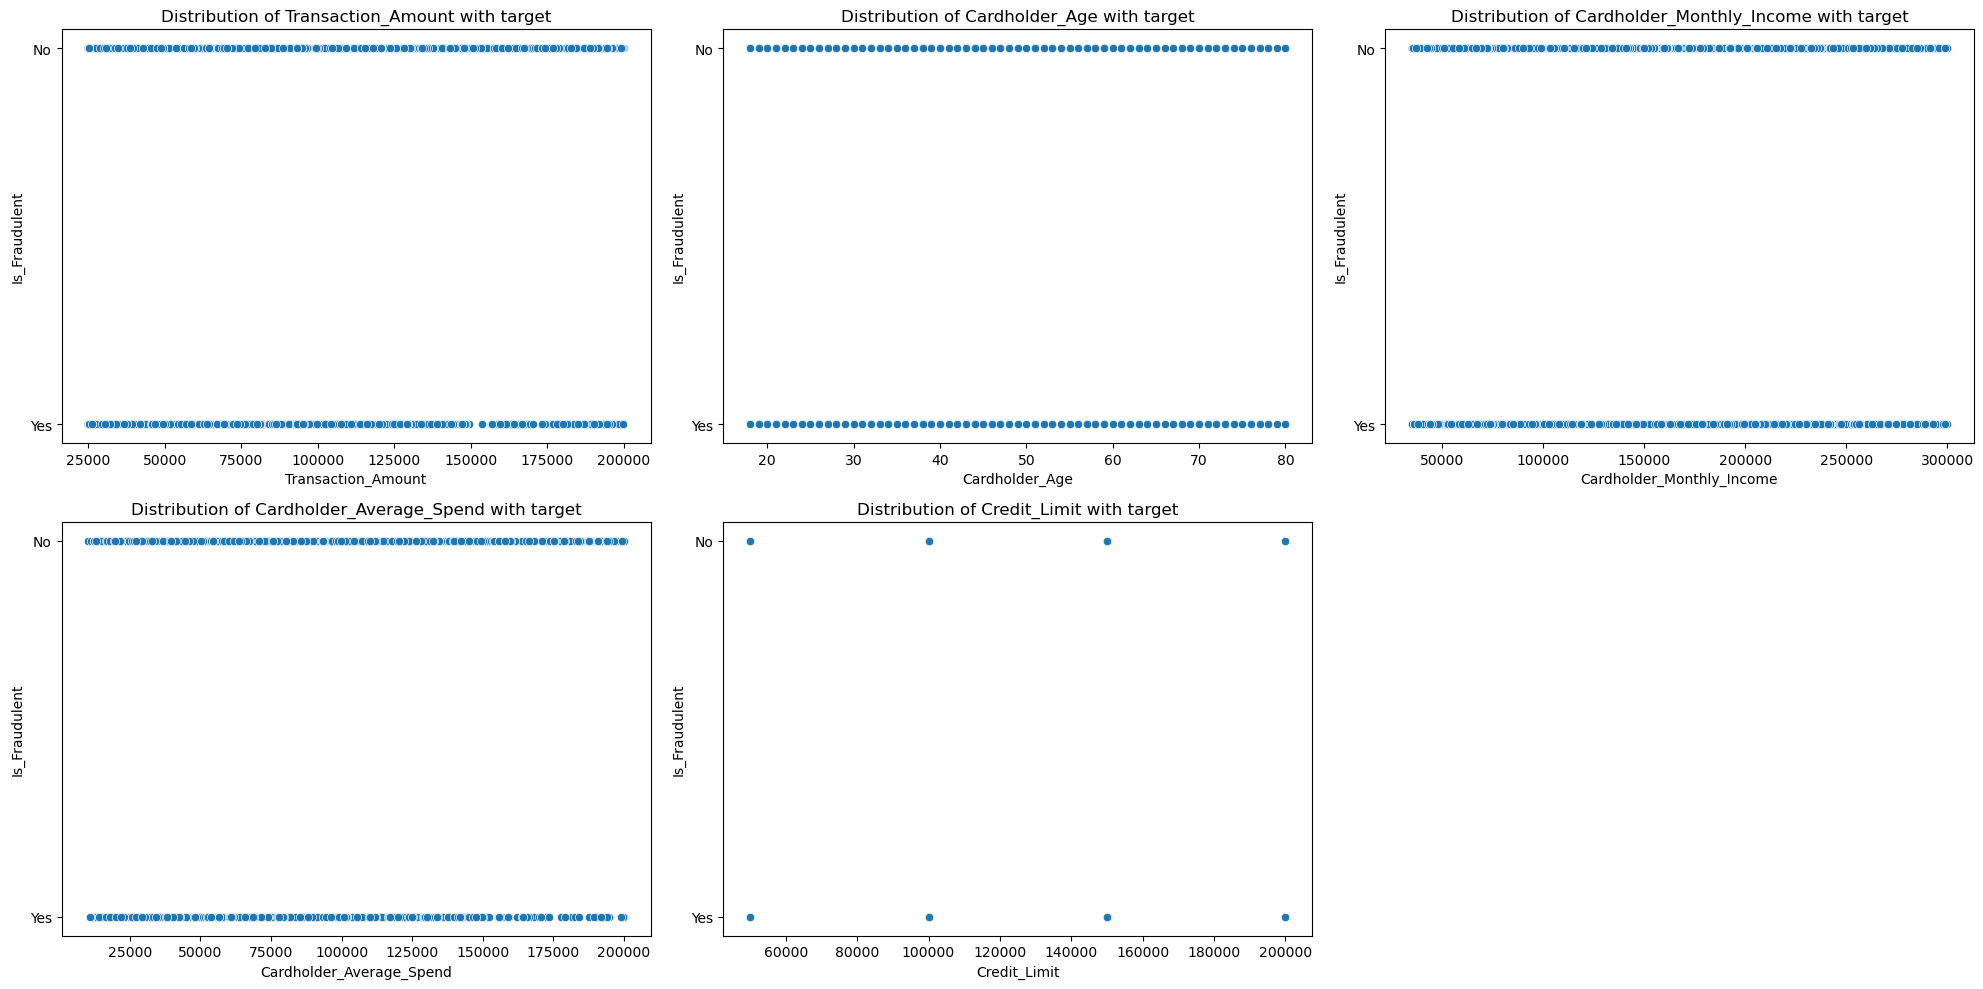

In [9]:
plt.figure(figsize=(20,10))
for index,col in enumerate(numerical_features,1):
    plt.subplot(2,3,index)
    sns.scatterplot(data=df,x=col,y="Is_Fraudulent")
    plt.title(f"Distribution of {col} with target")
plt.tight_layout()
plt.show()

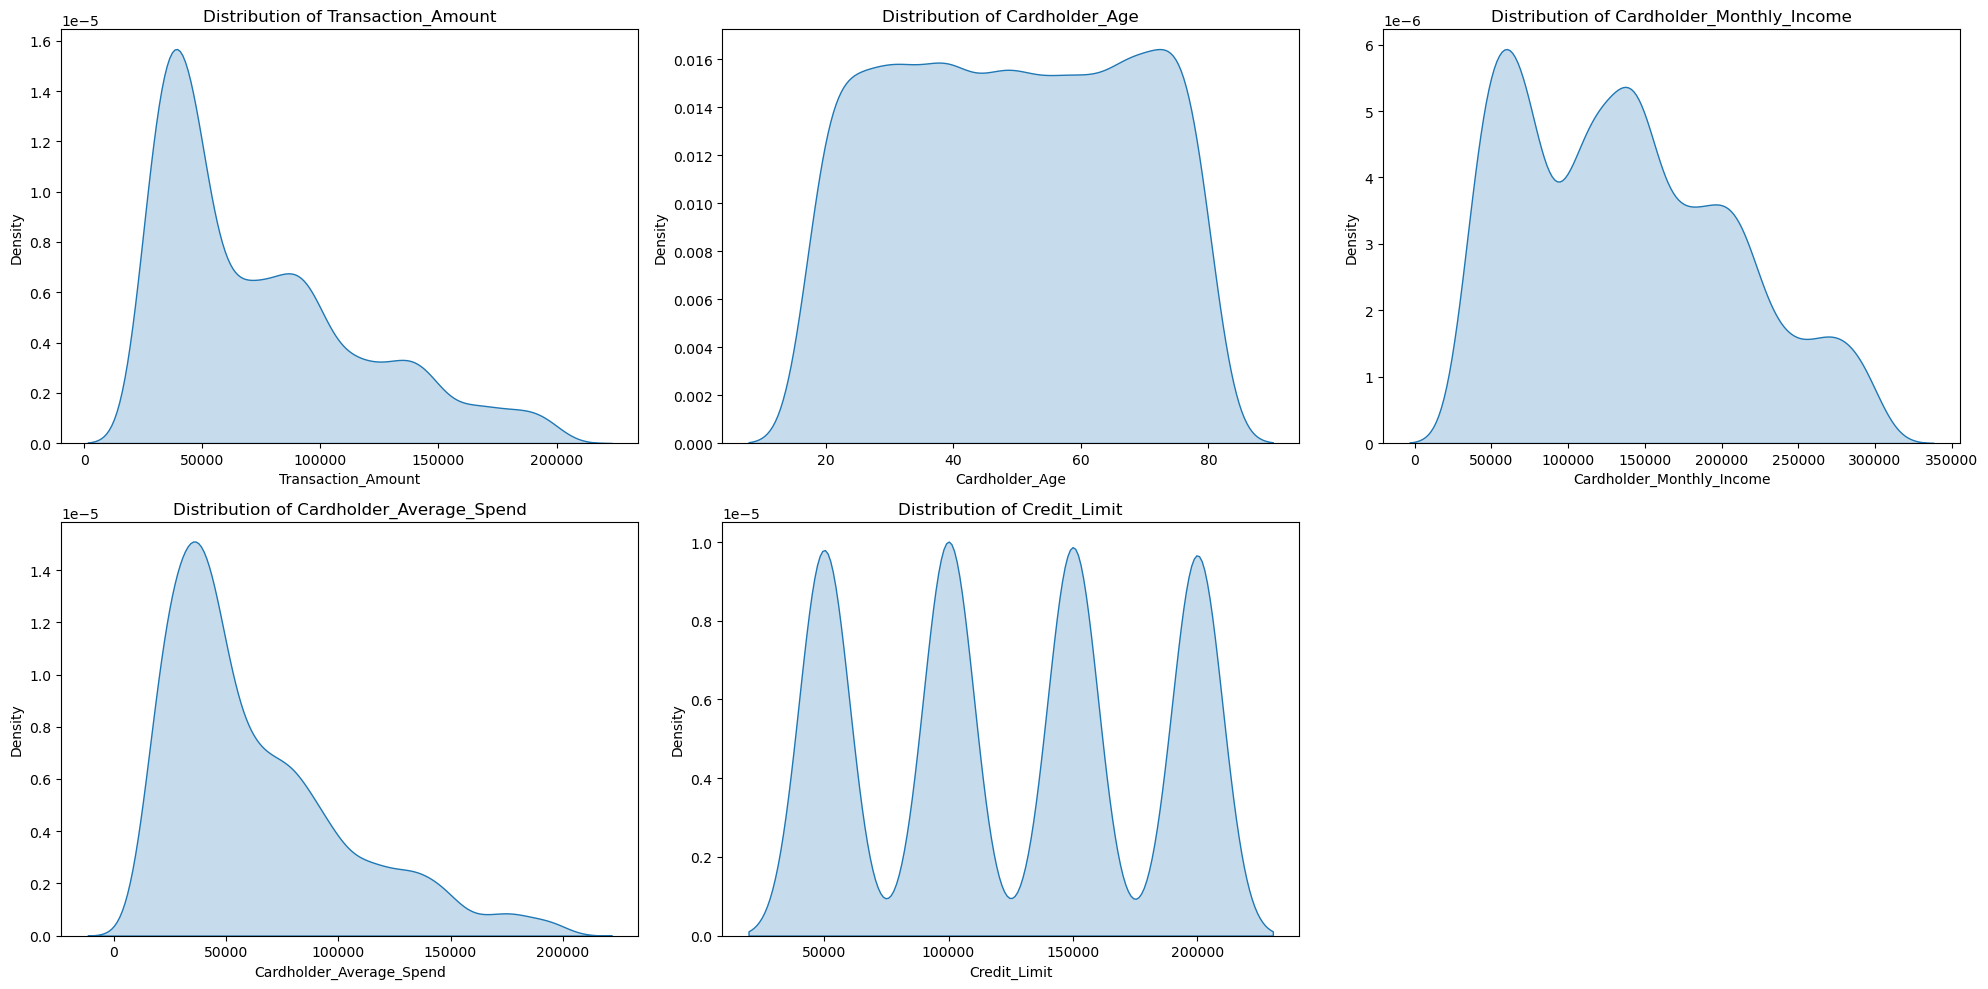

In [10]:
plt.figure(figsize=(20,10))
for index,col in enumerate(numerical_features,1):
    plt.subplot(2,3,index)
    sns.kdeplot(data=df,x=col,fill=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Multivariate Analysis

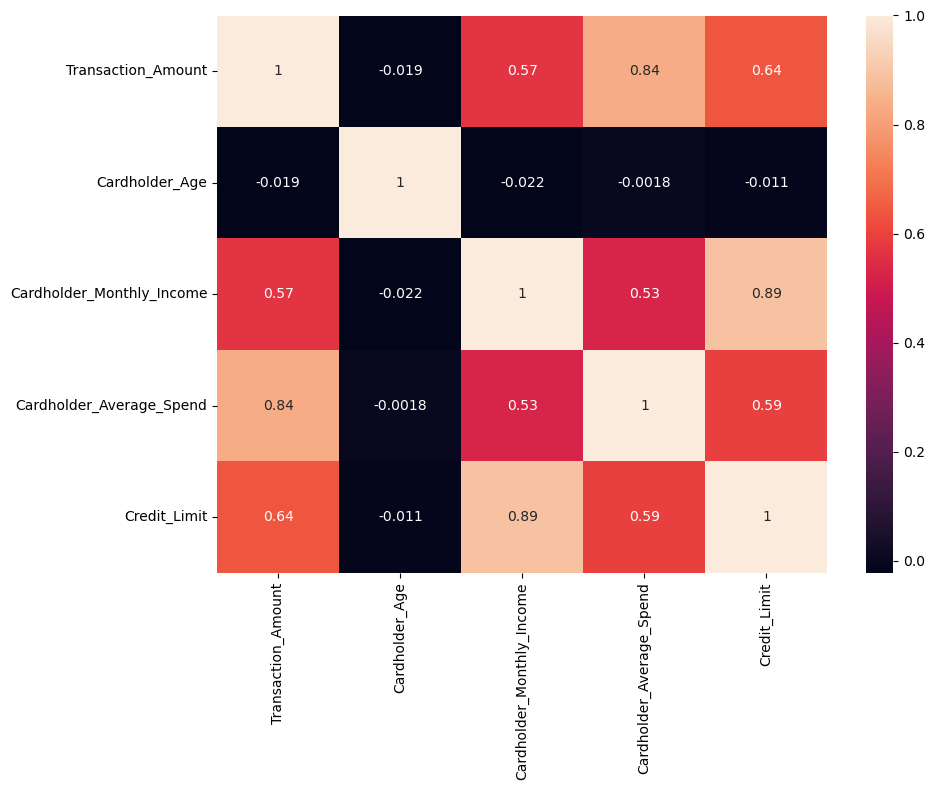

In [11]:
corr_matrix=numerical_features.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=corr_matrix,annot=True)
plt.tight_layout()
plt.show()

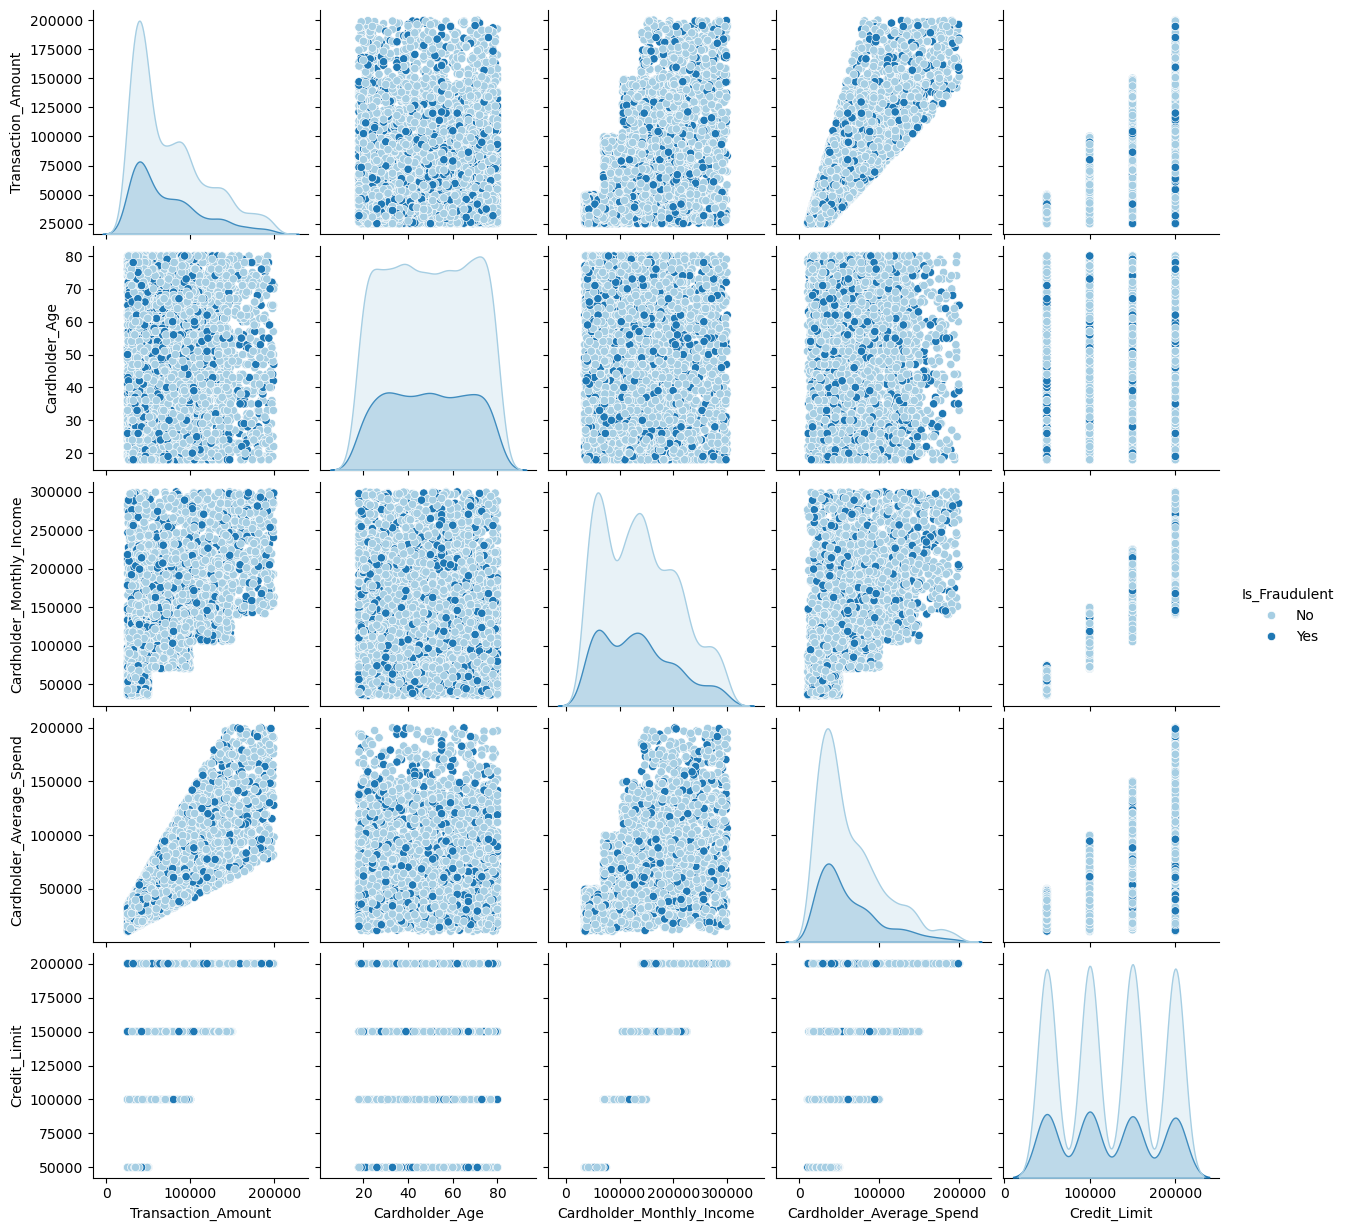

In [12]:
sns.pairplot(df[numerical_cols + ['Is_Fraudulent']], hue='Is_Fraudulent',palette="Paired")
plt.show()

## d)Visualize the distribution of transaction amounts for fraudulent vs. non-fraudulent transactions using histograms or box plots.

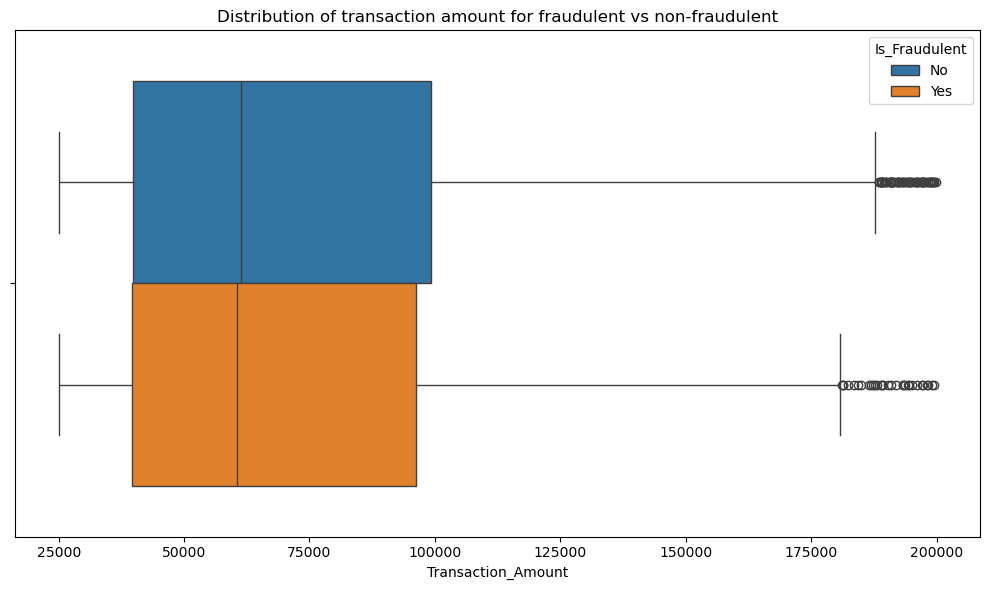

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="Transaction_Amount",hue="Is_Fraudulent")
plt.title("Distribution of transaction amount for fraudulent vs non-fraudulent")
plt.tight_layout()
plt.show()

## e)Investigate whether certain features are more susceptible to fraud

## 2) Data Preprocessing - Data Cleaning:

## a)Handle missing values if any, using appropriate techniques such as KNNImputer; mean or median imputation for numerical features, and mode imputation for categorical features.

## Treating null values for Numerical Features

In [14]:
numerical_features.isnull().sum()

Transaction_Amount             6
Cardholder_Age               135
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
dtype: int64

In [15]:
from sklearn.impute import KNNImputer,SimpleImputer
for col in numerical_features:
    median_impute=SimpleImputer(strategy='median')
    df[numerical_cols]=median_impute.fit_transform(df[numerical_cols])

In [16]:
df[numerical_cols].isnull().sum()

Transaction_Amount           0
Cardholder_Age               0
Cardholder_Monthly_Income    0
Cardholder_Average_Spend     0
Credit_Limit                 0
dtype: int64

## Treating null values for Categorical Features

In [17]:
categorical_features.isnull().sum()

Card_Type            17
Merchant_Category    22
Location              0
Region                0
Cardholder_Gender    89
Device_Type          40
Day_of_Week           0
Is_Fraudulent         0
dtype: int64

In [18]:
for col in categorical_features:
    mode_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols]=mode_imputer.fit_transform(df[categorical_cols])

In [19]:
df[categorical_cols].isnull().sum()

Card_Type            0
Merchant_Category    0
Location             0
Region               0
Cardholder_Gender    0
Device_Type          0
Day_of_Week          0
Is_Fraudulent        0
dtype: int64

After handling missing values by imputations, we got a cleaned dataset 

## b)Check for outliers in numerical features using statistical methods like Z-score or IQR (Interquartile Range) and remove them if necessary to ensure data quality.

In [20]:
## IQR Method
for col in numerical_features:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    print(f"\nQ1_for_{col}:{Q1}")
    print(f"Q3_for_{col}:{Q3}")
    print(f"IQR_for_{col}:{IQR}")
    print(f"lower_bound_for_{col}:{lower_bound}")
    print(f"upper_bound_for_{col}:{upper_bound}")
    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]


Q1_for_Transaction_Amount:39747.0
Q3_for_Transaction_Amount:98348.75
IQR_for_Transaction_Amount:58601.75
lower_bound_for_Transaction_Amount:-48155.625
upper_bound_for_Transaction_Amount:186251.375

Q1_for_Cardholder_Age:33.0
Q3_for_Cardholder_Age:65.0
IQR_for_Cardholder_Age:32.0
lower_bound_for_Cardholder_Age:-15.0
upper_bound_for_Cardholder_Age:113.0

Q1_for_Cardholder_Monthly_Income:74838.5
Q3_for_Cardholder_Monthly_Income:180941.0
IQR_for_Cardholder_Monthly_Income:106102.5
lower_bound_for_Cardholder_Monthly_Income:-84315.25
upper_bound_for_Cardholder_Monthly_Income:340094.75

Q1_for_Cardholder_Average_Spend:33644.21000000001
Q3_for_Cardholder_Average_Spend:79932.61
IQR_for_Cardholder_Average_Spend:46288.399999999994
lower_bound_for_Cardholder_Average_Spend:-35788.389999999985
upper_bound_for_Cardholder_Average_Spend:149365.21

Q1_for_Credit_Limit:50000.0
Q3_for_Credit_Limit:150000.0
IQR_for_Credit_Limit:100000.0
lower_bound_for_Credit_Limit:-100000.0
upper_bound_for_Credit_Limit:30

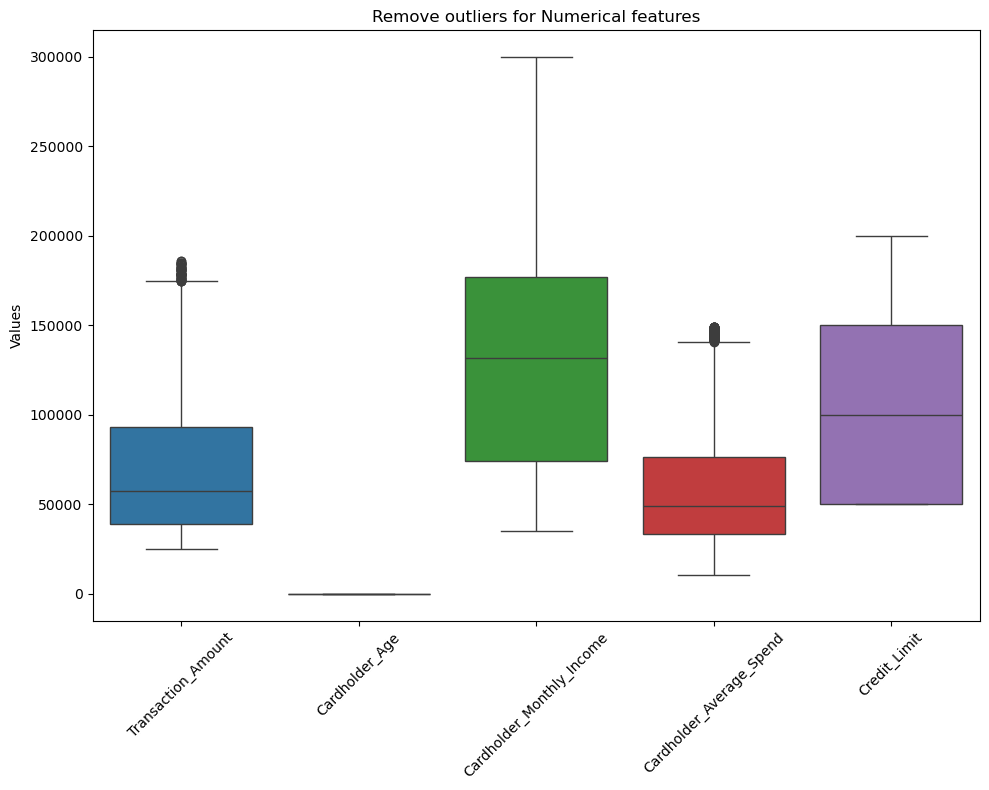

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[numerical_cols])
plt.title("Remove outliers for Numerical features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## c)Assess skewness in numerical features by calculating the skewness score. If any features are highly skewed, consider applying transformations such as square root or log transformation to improve their distribution before scaling, if needed.

In [22]:
## Caluculation of skewness of each features
print("Skewness Value for Numerical Features\n")
for col in numerical_features:
    numerical_features_skewness=numerical_features[col].skew()
    print(f"skewness_for_{col}:{numerical_features_skewness}")

Skewness Value for Numerical Features

skewness_for_Transaction_Amount:0.9684805088529197
skewness_for_Cardholder_Age:-0.009024730606999222
skewness_for_Cardholder_Monthly_Income:0.42836738385962947
skewness_for_Cardholder_Average_Spend:1.1550495870859774
skewness_for_Credit_Limit:0.009972095369336692


With the analysis of skewness score for numerical features Cardholder_Age score is -0.009. even its a negative slight skewness,but close to zero(dont want to do any transformations).

Credit_Limit skewness score is 0.009 it also close to zero but positive high skewness(dont want to do any transformations.

Cardholder_Monthly_Income is 0.4 hence it is less than 0.5 so we dont want to treat any transformation.

Transaction_Amount skewness score is 0.96 its close to 1. will check with square root transformations.

Cardholder_Average_Spend skewness score is 1.15 its greater than 0 and it is positive skewness. will try with square root transformations to reduce skewness to zero.

In [23]:
## Skewness treating for numerical features which has skewed data with square root transformation VS Log transformation

skewness_treat_features_sqrt=numerical_features[["Transaction_Amount","Cardholder_Average_Spend"]]
for col in skewness_treat_features_sqrt:
    skewness_treat_features_sqrt[col]=np.sqrt(numerical_features[col])

C:\Users\Madhu balan\AppData\Local\Temp\ipykernel_13632\205423496.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skewness_treat_features_sqrt[col]=np.sqrt(numerical_features[col])


Skewness treated for numerical features with sqrt method



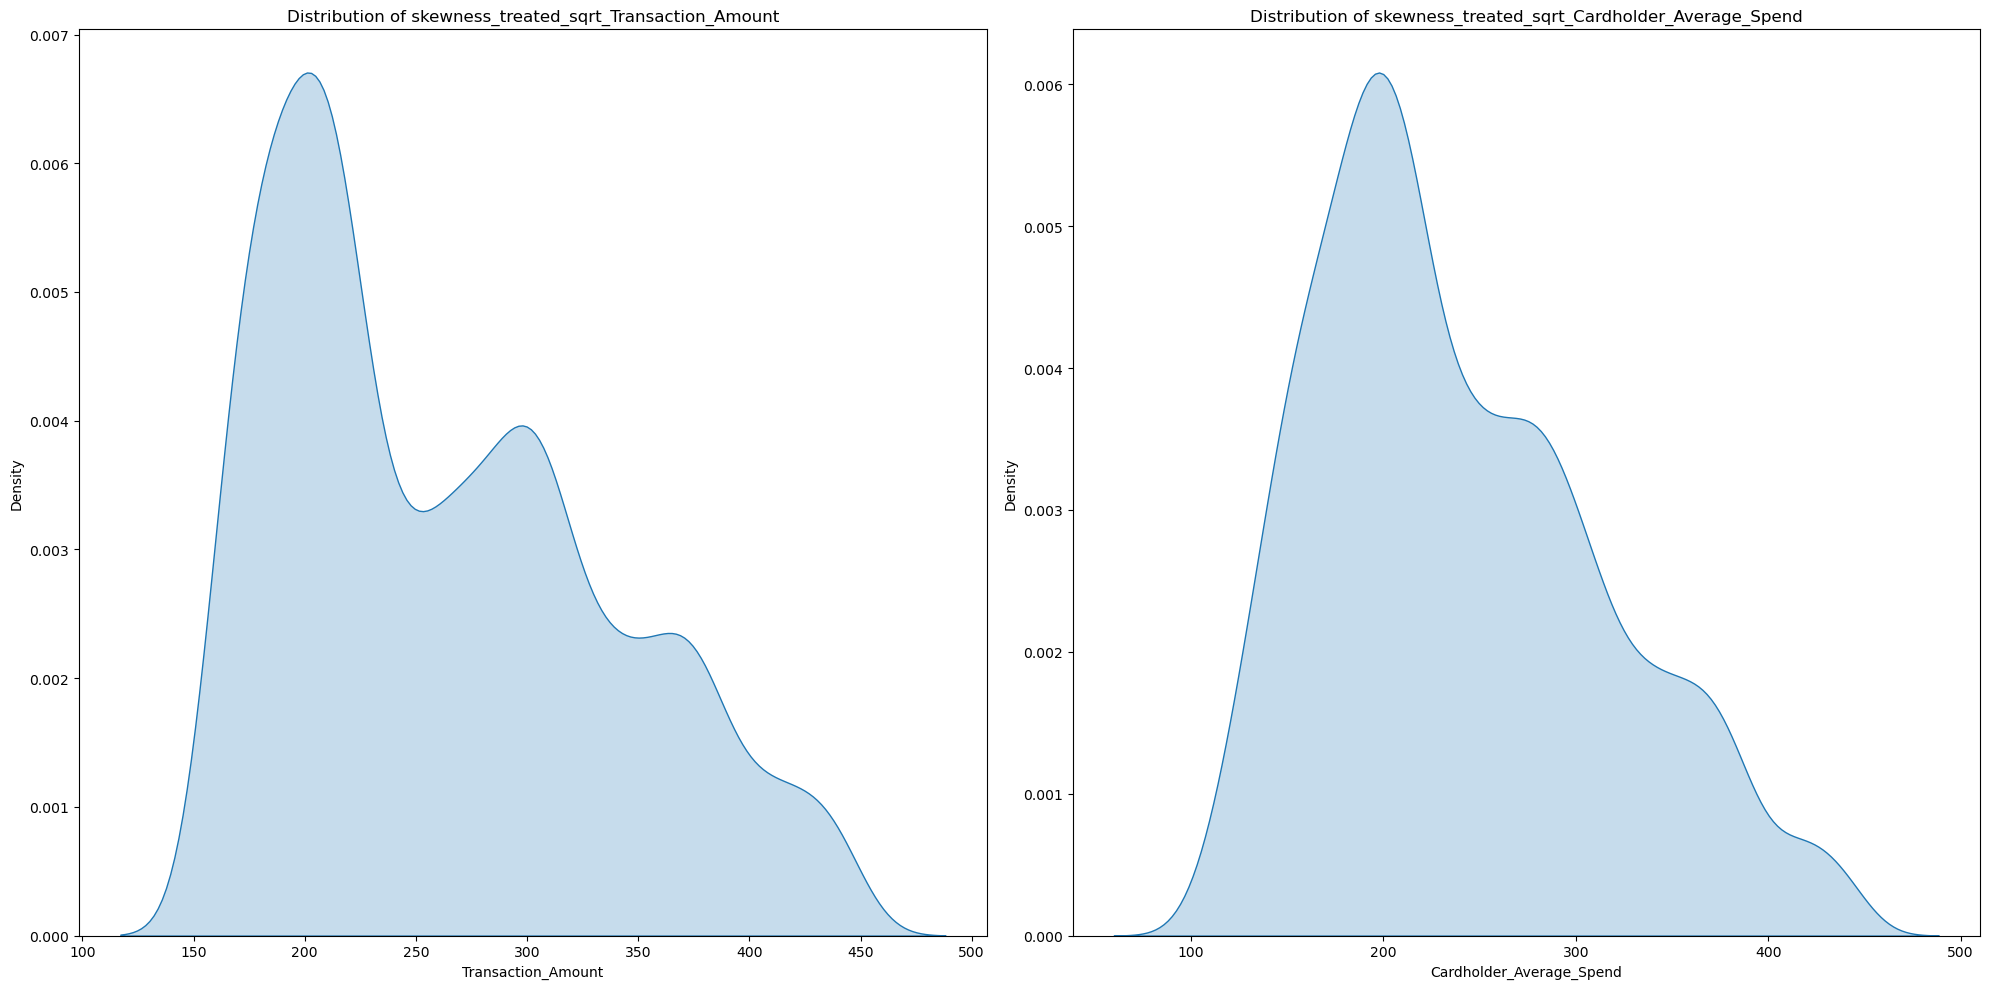

In [24]:
print("Skewness treated for numerical features with sqrt method\n")
plt.figure(figsize=(20,10))
for index,col in enumerate(skewness_treat_features_sqrt,1):
    plt.subplot(1,2,index)
    sns.kdeplot(data=skewness_treat_features_sqrt,x=col,fill=True)
    plt.title(f"Distribution of skewness_treated_sqrt_{col}")
plt.tight_layout()
plt.show()

In [25]:
for col in skewness_treat_features_sqrt:
    numerical_features_skewness_treated_sqrt=skewness_treat_features_sqrt[col].skew()
    print(f"skewness_for_{col}:{numerical_features_skewness_treated_sqrt}")

skewness_for_Transaction_Amount:0.577003186730585
skewness_for_Cardholder_Average_Spend:0.6003364262174106


In [26]:
skewness_treat_features_log=numerical_features[["Transaction_Amount","Cardholder_Average_Spend"]]
for col in skewness_treat_features_log:
    skewness_treat_features_log[col]=np.log(numerical_features[col])

C:\Users\Madhu balan\AppData\Local\Temp\ipykernel_13632\3131233877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skewness_treat_features_log[col]=np.log(numerical_features[col])


Skewness treated for numerical features with log method



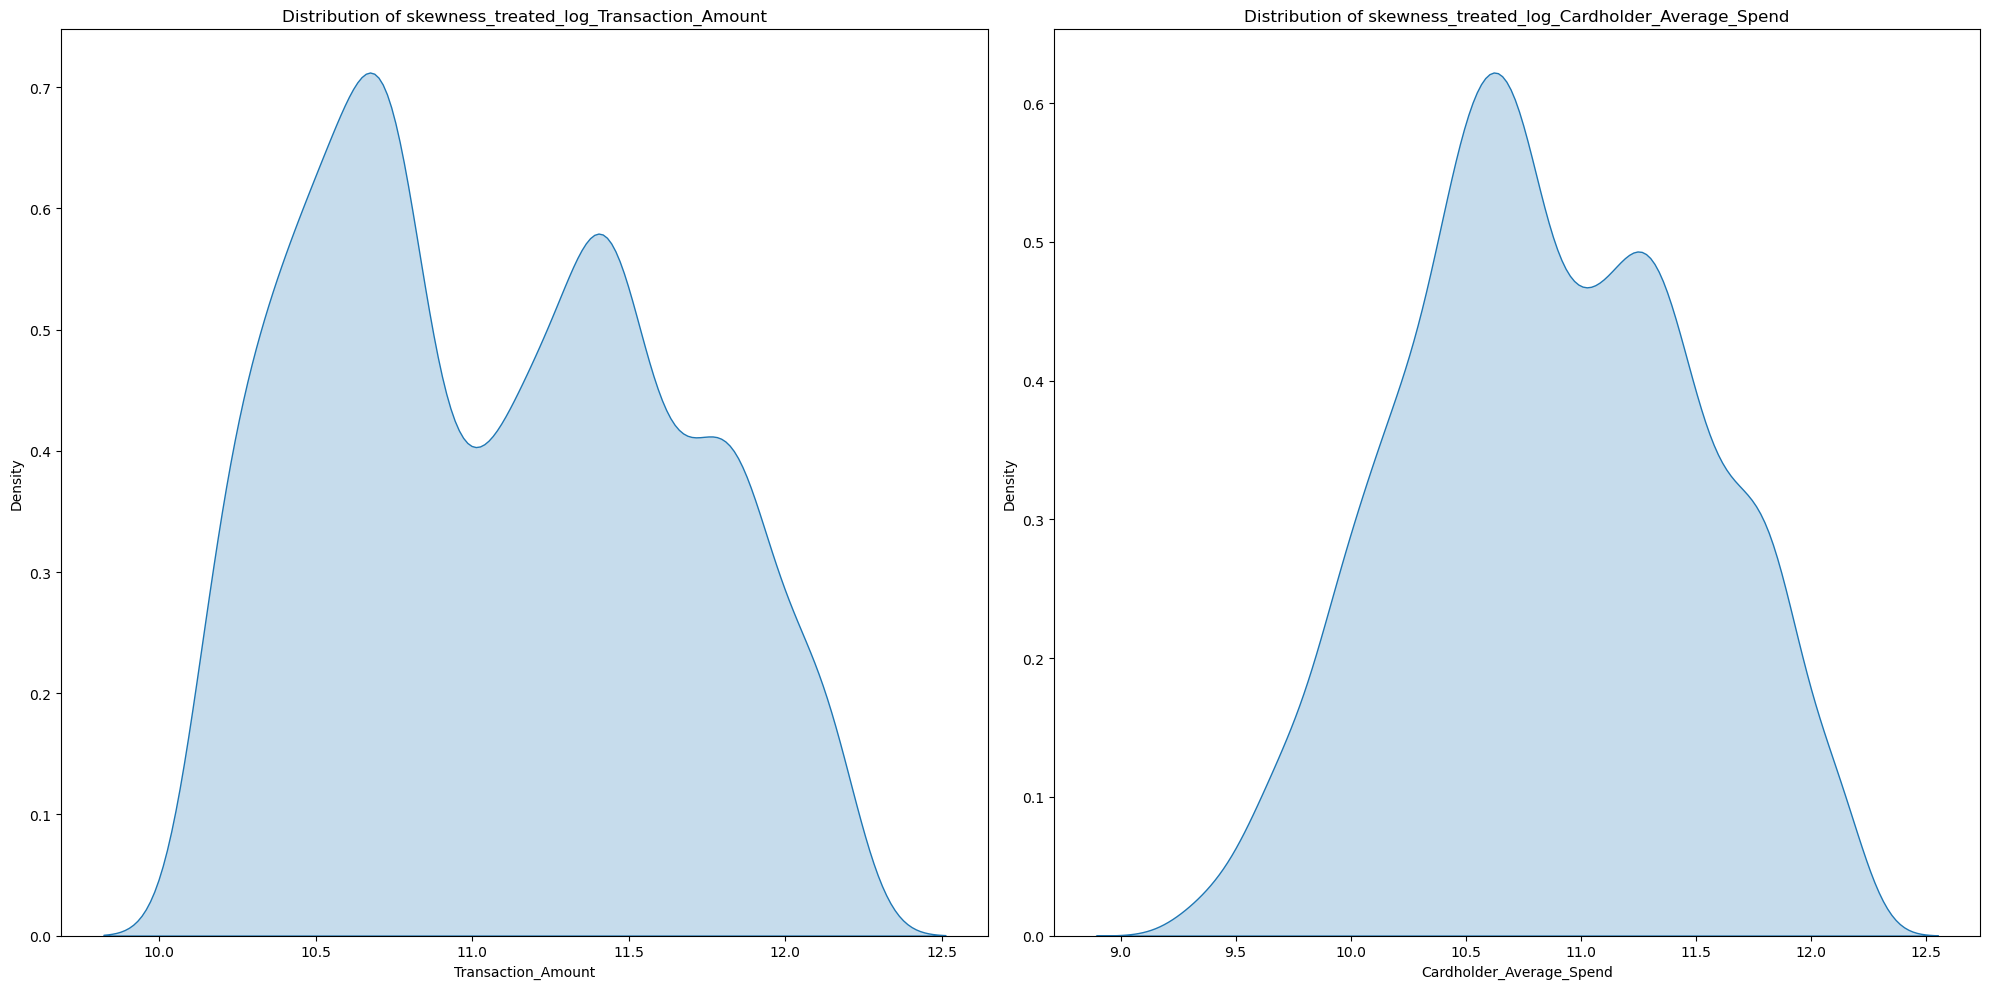

In [27]:
print("Skewness treated for numerical features with log method\n")
plt.figure(figsize=(20,10))
for index,col in enumerate(skewness_treat_features_log,1):
    plt.subplot(1,2,index)
    sns.kdeplot(data=skewness_treat_features_log,x=col,fill=True)
    plt.title(f"Distribution of skewness_treated_log_{col}")
plt.tight_layout()
plt.show()

In [28]:
for col in skewness_treat_features_log:
    numerical_features_skewness_treated_log=skewness_treat_features_log[col].skew()
    print(f"skewness_for_{col}:{numerical_features_skewness_treated_log}")

skewness_for_Transaction_Amount:0.20349038764726923
skewness_for_Cardholder_Average_Spend:0.012365038387096438


with the above analysis found log transformation performed over sqrt transformation

And skewness values reduced for Transaction_Amount from 0.95 to 0.2. Then for Cardholder_Average_Spend from 1.17 to 0.01

## 3)Feature Engineering:
## a)Identify the categorical features in the dataset.

In [29]:
categorical_features.columns

Index(['Card_Type', 'Merchant_Category', 'Location', 'Region',
       'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

## b)Encode categorical features to numerical using techniques like one-hot encoding or label encoding techniques to prepare the data for machine learning algorithms.

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()
for col in categorical_features:
    categorical_features[col]=le.fit_transform(categorical_features[col])
    df[col]=categorical_features[col]

In [32]:
categorical_features

,Card_Type,Merchant_Category,Location,Region,Cardholder_Gender,Device_Type,Day_of_Week,Is_Fraudulent
0,1,7,10,0,0,4,6,0
1,0,5,12,3,1,1,0,0
2,3,6,10,0,1,1,2,0
3,2,4,12,3,0,1,2,1
4,2,5,8,1,0,2,2,0
...,...,...,...,...,...,...,...,...
4995,2,1,3,1,0,0,0,1
4996,0,4,2,2,0,0,0,0
4997,3,3,11,3,1,1,2,0
4998,2,2,2,2,1,1,2,0


## 4)Feature Selection:
## a)Select relevant features that have the most impact on predicting fraudulent transactions.

In [33]:
features_df=df.drop(columns=["Transaction_ID","Is_Fraudulent","Transaction_DateTime"])
features_df.columns

Index(['Card_Type', 'Merchant_Category', 'Transaction_Amount', 'Location',
       'Region', 'Cardholder_Age', 'Cardholder_Gender',
       'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Credit_Limit',
       'Device_Type', 'Day_of_Week'],
      dtype='object')

In [34]:
target_df=df["Is_Fraudulent"]
target_df.head()

0    0
1    0
4    0
5    0
6    1
Name: Is_Fraudulent, dtype: int32

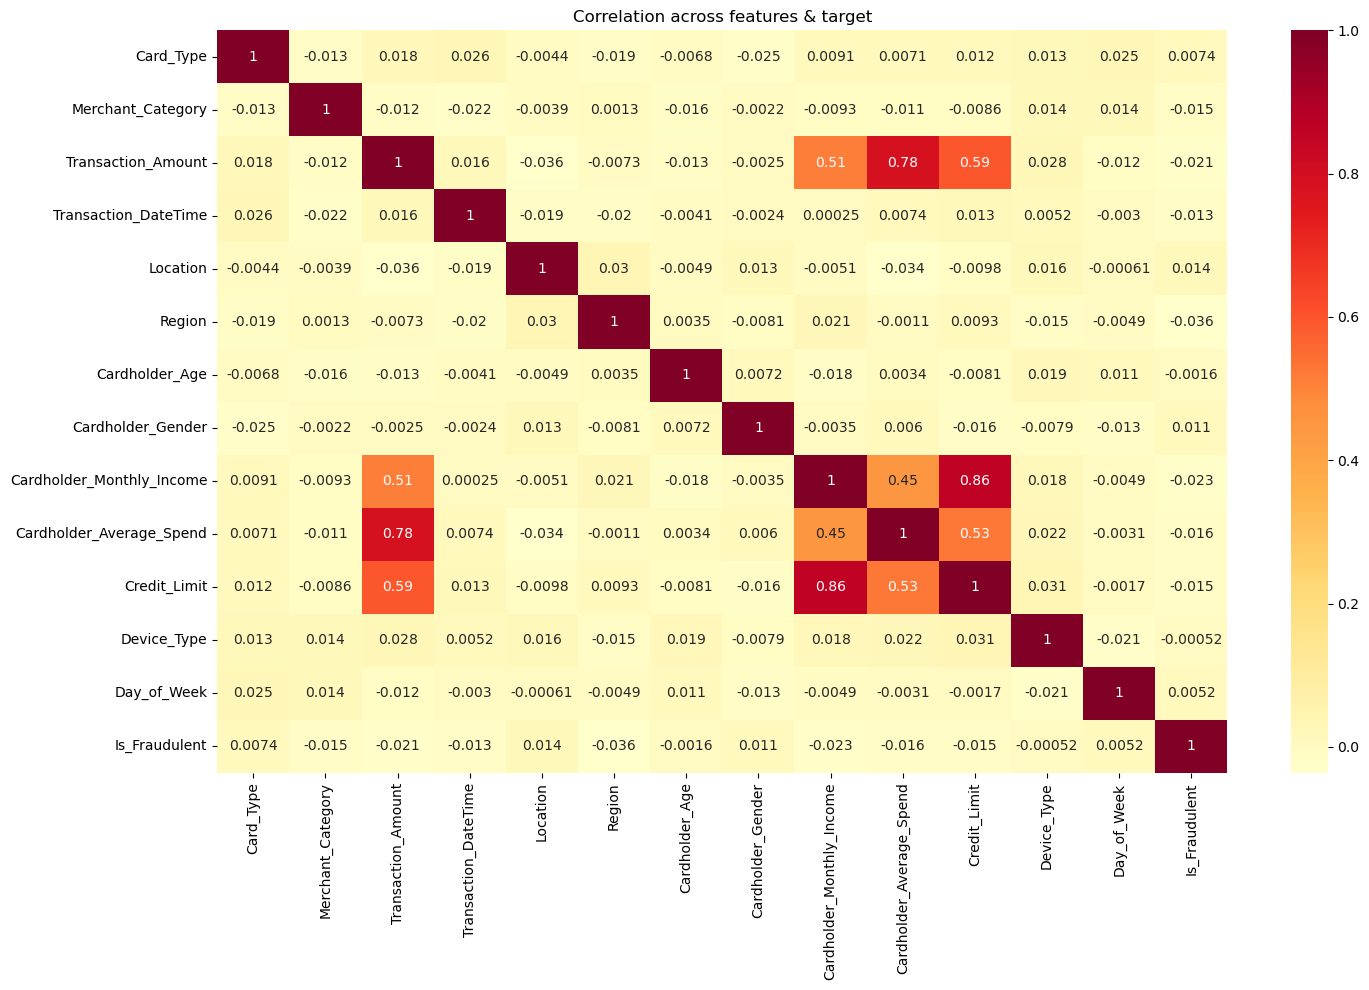

In [35]:
plt.figure(figsize=(15,10))
corr_matrix=df.drop(columns=["Transaction_ID"]).corr()
sns.heatmap(corr_matrix,annot=True,cmap="YlOrRd")
plt.title("Correlation across features & target")
plt.tight_layout()
plt.show()

## b) Identify and remove redundant or irrelevant features that do not contribute significantly to the prediction task.

In [36]:
correlation_with_fraudulent = corr_matrix["Is_Fraudulent"].sort_values(ascending=False)
features= correlation_with_fraudulent.index[1:] 
features

Index(['Location', 'Cardholder_Gender', 'Card_Type', 'Day_of_Week',
       'Device_Type', 'Cardholder_Age', 'Transaction_DateTime',
       'Merchant_Category', 'Credit_Limit', 'Cardholder_Average_Spend',
       'Transaction_Amount', 'Cardholder_Monthly_Income', 'Region'],
      dtype='object')

## 5)Split data into training and testing:
## a)Divide the dataset into training and testing sets to evaluate the model's performance.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(features_df,target_df,test_size=0.2,random_state=42)

In [39]:
X_train.shape

(3796, 12)

In [40]:
X_test.shape

(950, 12)

In [41]:
y_train.shape

(3796,)

In [42]:
y_test.shape

(950,)

## b)Ensure that both sets maintain the same distribution of fraudulent and non-fraudulent transactions to avoid data leakage.

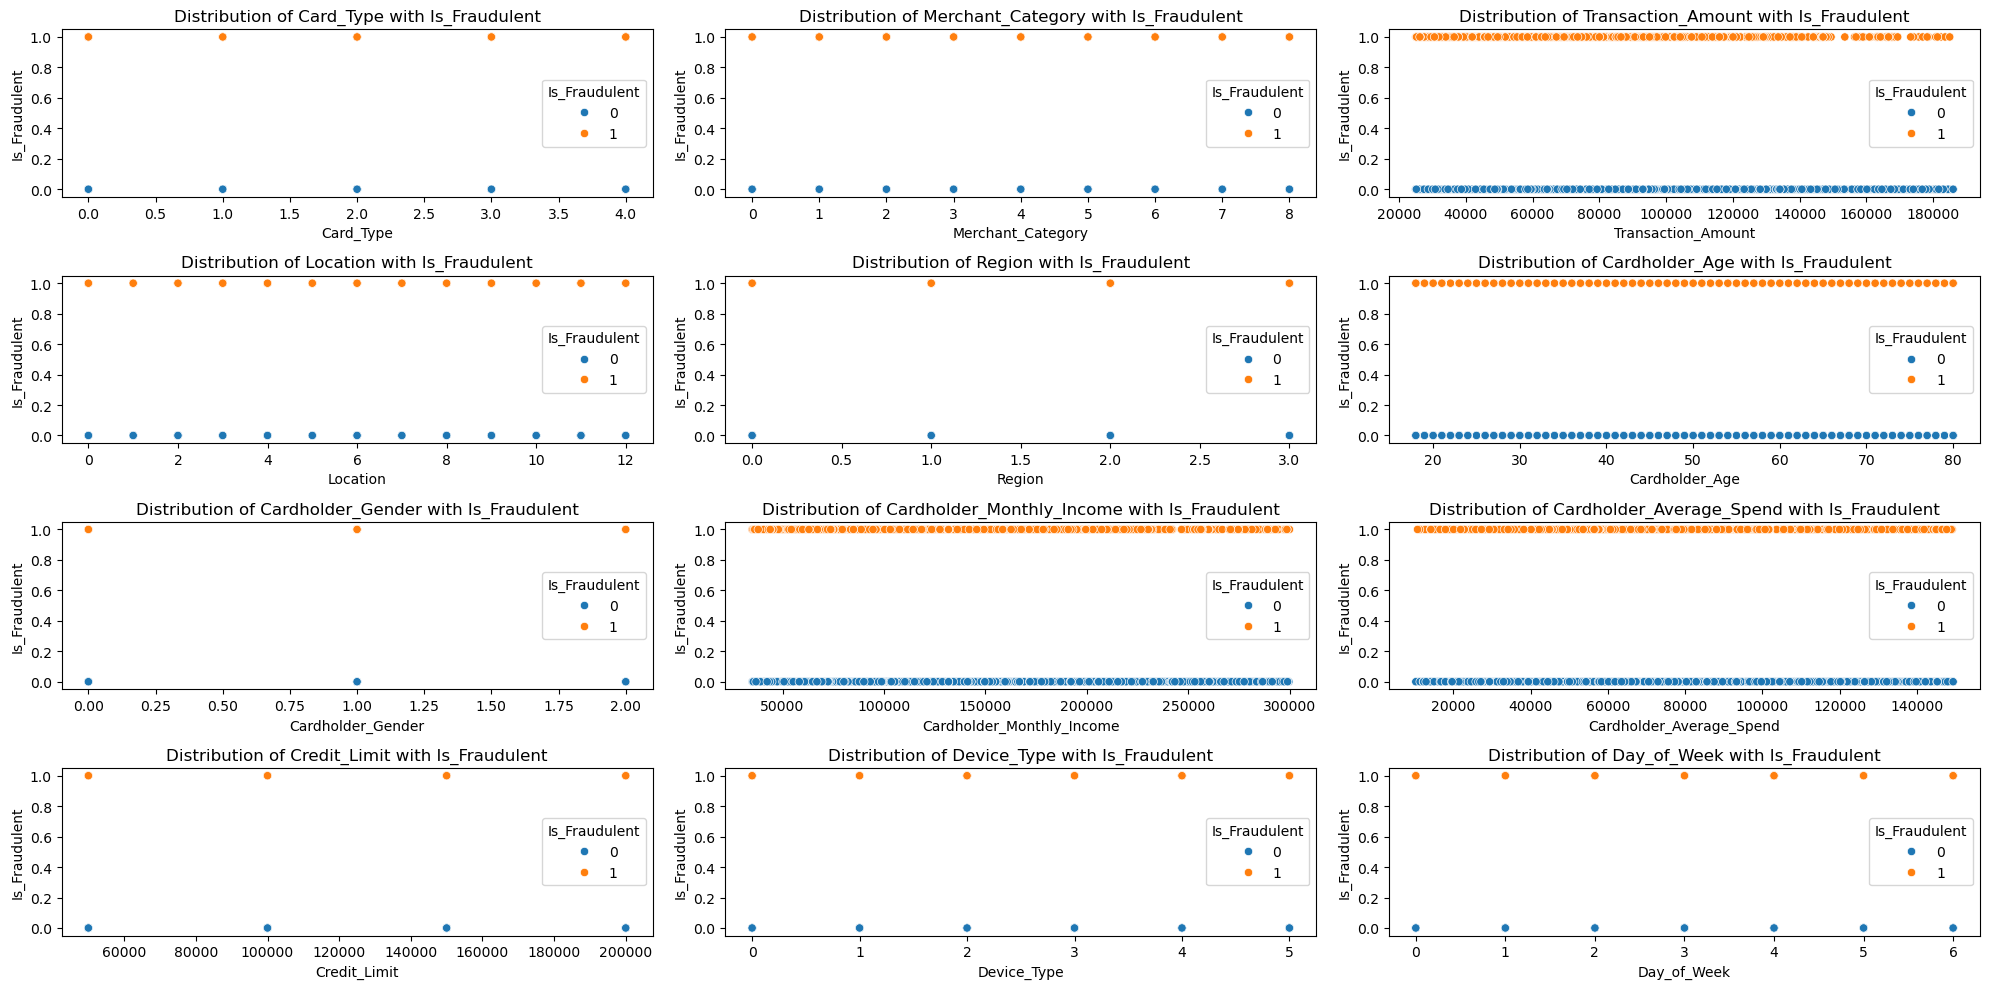

In [43]:
plt.figure(figsize=(20,10))
for index,col in enumerate(features_df,1):
    plt.subplot(4,3,index)
    sns.scatterplot(data=df,x=col,y="Is_Fraudulent",hue="Is_Fraudulent")
    plt.title(f"Distribution of {col} with Is_Fraudulent")
plt.tight_layout()
plt.show()

## 6)Feature Scaling:
## a)Scale numerical features to ensure that they have the same magnitude, preventing some features from dominating others during model training.

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test) 

## b)Common scaling techniques include Min-Max scaling or Standardization (Z-score or normalization).

Standardization method used

## 7)Build the Machine Learning Model:
## a)Import the necessary modules and libraries for building and evaluating machine learning models.

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

## b)Define a list or dictionary of classifiers to be evaluated; including Logistic Regression, Naive Bayes, Decision Tree, Random Forest, K-Nearest Neighbors, and SVM. Then, compute the accuracy score and F1-score for each classifier.

In [48]:
classifiers={
    "LR":LogisticRegression(random_state=42),
    "GNB":GaussianNB(),
    "DT":DecisionTreeClassifier(max_depth=4,random_state=40),
    "RFC":RandomForestClassifier(random_state=30),
    "KNC":KNeighborsClassifier(n_neighbors=10),
    "SVC":SVC()
}

## c)Select a machine learning algorithm for binary classification with the highest accuracy or F1-score from the above step.

In [49]:
result={}

for name,clf in classifiers.items():
    clf.fit(X_train_scaled,y_train)
    y_pred=clf.predict(X_test_scaled)
    accuracy=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    result[name]={"Accuracy_score":accuracy,"F1_score":f1}

result_df=pd.DataFrame(result).T
result_df=result_df.reset_index().rename(columns={"index":"Name"})
result_df

,Name,Accuracy_score,F1_score
0,LR,0.741053,0.000000
1,GNB,0.741053,0.000000
2,DT,0.740000,0.008032
3,RFC,0.738947,0.015873
4,KNC,0.722105,0.057143
5,SVC,0.741053,0.000000


## d)Train the selected model using the training dataset and evaluate its performance using appropriate metrics like confusion matrix, accuracy, precision, recall, and F1-score.

In [50]:
best_model_clf= max(result, key=lambda x: result[x]['F1_score'])
print("\nBest Performing Model Classifiers\n")
print(f"Best_model : {best_model_clf} with F1_score : {result[best_model_clf]['F1_score']}")


Best Performing Model Classifiers

Best_model : KNC with F1_score : 0.05714285714285714


## e)Validate the model's performance on the testing dataset and interpret the results to assess its effectiveness in detecting fraudulent transactions.

In [51]:
best_model = classifiers[best_model_clf]
best_model.fit(X_train_scaled, y_train)
y_pred =best_model.predict(X_test_scaled)

In [52]:
CM = confusion_matrix(y_test, y_pred)
print(CM)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[[678  26]
 [238   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       704
           1       0.24      0.03      0.06       246

    accuracy                           0.72       950
   macro avg       0.49      0.50      0.45       950
weighted avg       0.61      0.72      0.64       950



The model is performed well at predicting frauduents and non-fraudulent transactions